In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
# gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

Function to plot the confusion matrix

In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

Load the data

In [5]:
#1. Upload and read the CSV
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
    print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')
    data = pd.read_csv(fn)

# 2. Identify target column (e.g. 'Class' or 'Success')
target_col = [c for c in data.columns if c.lower() in ('class','success')][0]

# 3. Split features/target
X = data.drop(target_col, axis=1)
Y = data[target_col]

# 4. Encode categorical features
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder
for col in X.select_dtypes(include=['object']):
    X[col] = LabelEncoder().fit_transform(X[col])

Saving spacex_launch_dash (1).csv to spacex_launch_dash (1) (2).csv
User uploaded file "spacex_launch_dash (1) (2).csv" with length 2478 bytes


In [ ]:
import requests
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
# Fetch the data using requests instead of js.fetch
resp1 = requests.get(URL1).content
# Use io.BytesIO to handle the response content
text1 = io.BytesIO(resp1)
data = pd.read_csv(text1)

In [ ]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [ ]:
import requests
import io

URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
# Use requests.get to fetch the data
resp2 = requests.get(URL2).content
# Use io.BytesIO to handle the response content
text2 = io.BytesIO(resp2)
X = pd.read_csv(text2)

In [ ]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [ ]:
Y = data['Class'].to_numpy()
print(Y)
Y = pd.Series(Y)
Y

[0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


,0
0,0
1,0
2,0
3,0
4,0
...,...
85,1
86,1
87,1
88,1


**Standardize** the data in X then reassign it to the variable X using the transform provided below.

In [ ]:
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (72, 83) (72,)
Test set: (18, 83) (18,)


logistic regression

In [ ]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

lr=LogisticRegression()

logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


Accuracy on the test data: 0.8333333333333334


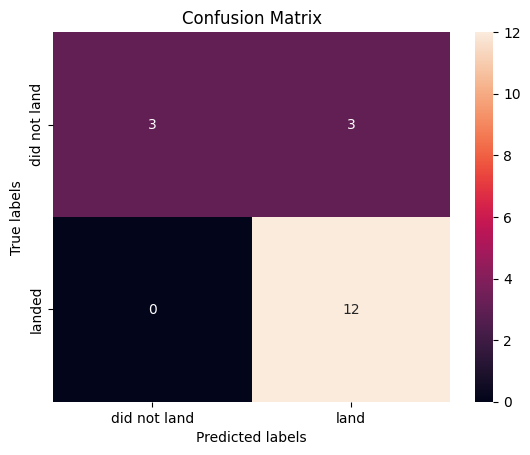

In [ ]:
yhat=logreg_cv.predict(X_test)
print("Accuracy on the test data:", logreg_cv.score(X_test, Y_test))
plot_confusion_matrix(Y_test,yhat)

SVM

In [ ]:
import numpy as np
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)

print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


Accuracy on the test data: 0.8333333333333334


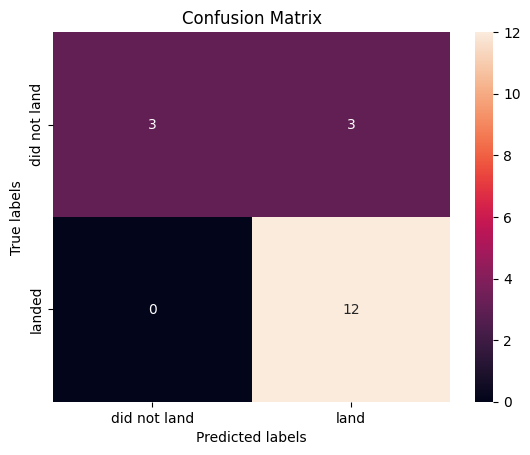

In [ ]:
yhat=svm_cv.predict(X_test)
print("Accuracy on the test data:", svm_cv.score(X_test, Y_test))
plot_confusion_matrix(Y_test,yhat)

DecisionTreeClassifier

In [ ]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, Y_train)
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

NameError: name 'DecisionTreeClassifier' is not defined

Accuracy on the test data: 0.9444444444444444


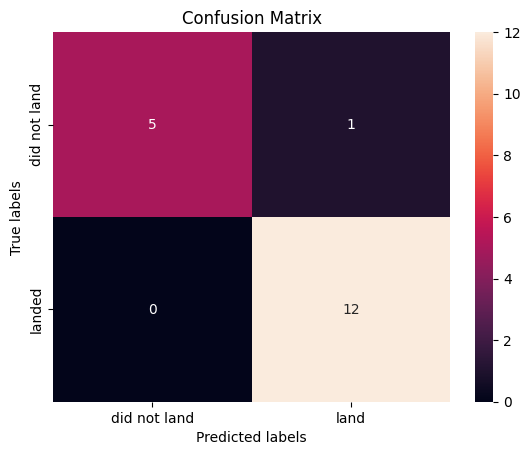

In [ ]:
yhat = tree_cv.predict(X_test)
print("Accuracy on the test data:", tree_cv.score(X_test, Y_test))
plot_confusion_matrix(Y_test,yhat)

KNeighborsClassifier

In [ ]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train, Y_train)

print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


Accuracy on the test data: 0.8333333333333334


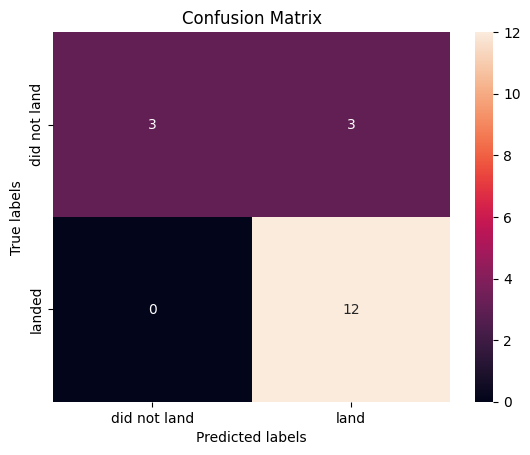

In [ ]:
yhat = knn_cv.predict(X_test)
print("Accuracy on the test data:", knn_cv.score(X_test, Y_test))
plot_confusion_matrix(Y_test,yhat)


tuned hpyerparameters :(best parameters)  {'learning_rate': 0.01, 'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 200}
accuracy : 0.8196428571428571
Accuracy on the test data: 0.8333333333333334


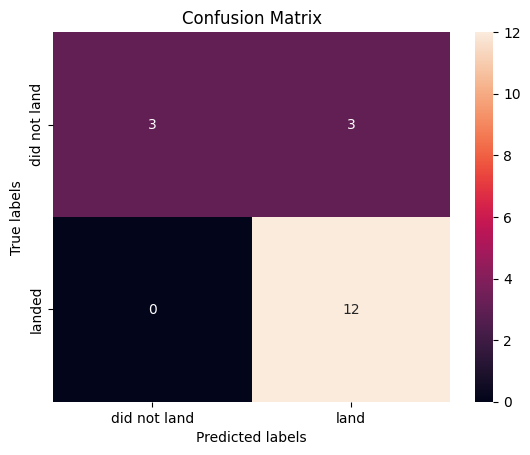

In [ ]:
# prompt: gradient boosting

from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Classifier
parameters = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

gb = GradientBoostingClassifier()
gb_cv = GridSearchCV(gb, parameters, cv=10)
gb_cv.fit(X_train, Y_train)

print("tuned hpyerparameters :(best parameters) ", gb_cv.best_params_)
print("accuracy :", gb_cv.best_score_)
yhat = gb_cv.predict(X_test)
print("Accuracy on the test data:", gb_cv.score(X_test, Y_test))
plot_confusion_matrix(Y_test, yhat)


tuned hpyerparameters :(best parameters)  {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
accuracy : 0.8607142857142855
Accuracy on the test data: 0.8333333333333334


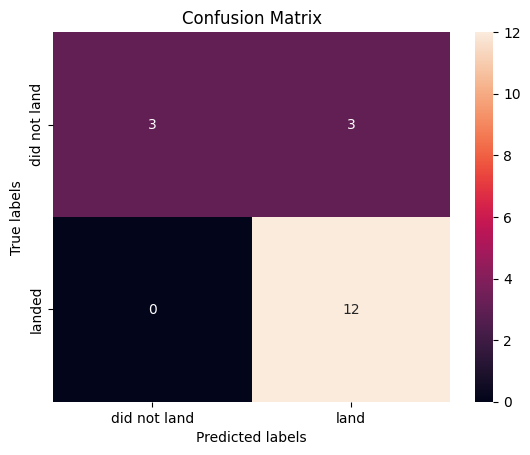

In [ ]:
# prompt: Random forest

from sklearn.ensemble import RandomForestClassifier
# Random Forest Classifier
parameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier()
rf_cv = GridSearchCV(rf, parameters, cv=10)
rf_cv.fit(X_train, Y_train)

print("tuned hpyerparameters :(best parameters) ", rf_cv.best_params_)
print("accuracy :", rf_cv.best_score_)
yhat = rf_cv.predict(X_test)
print("Accuracy on the test data:", rf_cv.score(X_test, Y_test))
plot_confusion_matrix(Y_test, yhat)


In [ ]:
# prompt: display for random forest what are the parameter used and best parameter

print("tuned hpyerparameters :(best parameters) ", rf_cv.best_params_)
print("accuracy :", rf_cv.best_score_)


tuned hpyerparameters :(best parameters)  {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
accuracy : 0.8607142857142855


In [ ]:
# prompt: XGBoost

!pip install xgboost

import xgboost as xgb
from sklearn.metrics import accuracy_score

# ... (Your existing code) ...

# XGBoost Classifier
parameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_cv = GridSearchCV(xgb_clf, parameters, cv=10)
xgb_cv.fit(X_train, Y_train)

print("tuned hpyerparameters :(best parameters) ", xgb_cv.best_params_)
print("accuracy :", xgb_cv.best_score_)
yhat = xgb_cv.predict(X_test)
print("Accuracy on the test data:", accuracy_score(Y_test, yhat))
plot_confusion_matrix(Y_test, yhat)


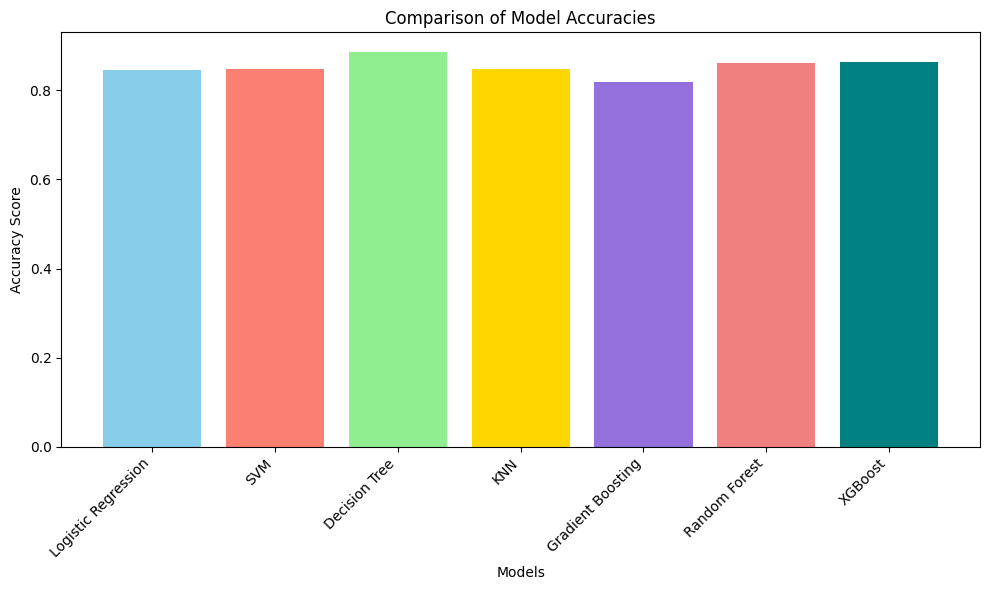

The best performing model is: Decision Tree with an accuracy of 0.8857142857142858


In [ ]:
# prompt: Find the method performs best:
# and show me the visualization

import matplotlib.pyplot as plt

# Assuming you have the accuracy scores for each model stored in a dictionary
accuracy_scores = {
    'Logistic Regression': logreg_cv.best_score_,
    'SVM': svm_cv.best_score_,
    'Decision Tree': tree_cv.best_score_,
    'KNN': knn_cv.best_score_,
    'Gradient Boosting': gb_cv.best_score_,
    'Random Forest': rf_cv.best_score_,
    'XGBoost': xgb_cv.best_score_
}

models = list(accuracy_scores.keys())
scores = list(accuracy_scores.values())

plt.figure(figsize=(10, 6))
plt.bar(models, scores, color=['skyblue', 'salmon', 'lightgreen', 'gold', 'mediumpurple', 'lightcoral', 'teal'])
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Model Accuracies")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Find the best model
best_model = max(accuracy_scores, key=accuracy_scores.get)
print(f"The best performing model is: {best_model} with an accuracy of {accuracy_scores[best_model]}")


In [ ]:
import pandas as pd

# Assuming you have the accuracy_scores dictionary from the previous code
accuracy_scores = {
    'Logistic Regression': logreg_cv.best_score_,
    'SVM': svm_cv.best_score_,
    'Decision Tree': tree_cv.best_score_,
    'KNN': knn_cv.best_score_,
    'Gradient Boosting': gb_cv.best_score_,
    'Random Forest': rf_cv.best_score_,
    'XGBoost': xgb_cv.best_score_
}

# Create a DataFrame
df = pd.DataFrame(list(accuracy_scores.items()), columns=['Algorithm', 'Accuracy'])

# Sort the DataFrame by accuracy in ascending order
df_sorted = df.sort_values(by='Accuracy', ascending=True)

# Display the sorted table
print(df_sorted)

# Find the best model
best_model = df_sorted.iloc[-1]['Algorithm']
best_accuracy = df_sorted.iloc[-1]['Accuracy']
print(f"\nThe best performing model is: {best_model} with an accuracy of {best_accuracy}")


In [ ]:
# prompt: download .pkl file for the best model

import pickle

# Assuming 'xgb_cv' is your best model from the previous code
# Replace 'xgb_cv' with the variable name of your best model if different

best_model = tree_cv # Replace with your actual best model variable

# Save the model to a .pkl file
filename = 'decisiontree_spacex.pkl'
pickle.dump(best_model, open(filename, 'wb'))

# Download the .pkl file
from google.colab import files
files.download(filename)


NameError: name 'tree_cv' is not defined

In [ ]:
#parametrs used for desision tree
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

#print("parameters =", parameters)
print("The best parameters for the decision tree are:", tree_cv.best_params_)

The best parameters for the decision tree are: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}


In [ ]:
The code trains several machine learning models to predict whether a rocket launch will result in a successful landing ('land') or not ('did not land').  The target variable is 'Class' in the dataset.  A successful landing, in this context, means the booster successfully performed a controlled descent and landed, either on a ground pad or on a drone ship.  It does *not* refer to landing in space.


In [ ]:
import requests
import io

URL1 =
# Fetch the data using requests instead of js.fetch
resp1 = requests.get(URL1).content
# Use io.BytesIO to handle the response content
text1 = io.BytesIO(resp1)
data = pd.read_csv(text1)

In [ ]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

data = pd.read_csv(fn)
data.head()

Saving spacex_launch_dash.csv to spacex_launch_dash (1).csv
User uploaded file "spacex_launch_dash (1).csv" with length 2478 bytes


,Unnamed: 0,Flight Number,Launch Site,class,Payload Mass (kg),Booster Version,Booster Version Category
0,0,1,CCAFS LC-40,0,0.0,F9 v1.0 B0003,v1.0
1,1,2,CCAFS LC-40,0,0.0,F9 v1.0 B0004,v1.0
2,2,3,CCAFS LC-40,0,525.0,F9 v1.0 B0005,v1.0
3,3,4,CCAFS LC-40,0,500.0,F9 v1.0 B0006,v1.0
4,4,5,CCAFS LC-40,0,677.0,F9 v1.0 B0007,v1.0


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

#1. Upload and read the CSV
uploaded = files.upload()
for fn in uploaded.keys():
    print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')
    data = pd.read_csv(fn)

# 2. Identify target column (e.g. 'Class' or 'Success')
target_col = [c for c in data.columns if c.lower() in ('class','success')][0]

# 3. Split features/target
X = data.drop(target_col, axis=1)
y = data[target_col]

# 4. Encode categorical features
for col in X.select_dtypes(include=['object']):
    X[col] = LabelEncoder().fit_transform(X[col])

# 5. Train-test split and Decision Tree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 6. Predict & evaluate
y_pred = clf.predict(X_test)
print(f"Decision Tree accuracy: {accuracy_score(y_test, y_pred):.2f}")


Saving spacex_launch_dash.csv to spacex_launch_dash (8).csv
User uploaded file "spacex_launch_dash (8).csv" with length 2478 bytes
Decision Tree accuracy: 0.83


parameters that each algorithm took to calculate the accuracy the algorithm

In [ ]:
# Logistic Regression
parameters_lr ={'C':[0.01,0.1,1],'penalty':['l2'],'solver':['lbfgs']}
# ... (rest of your Logistic Regression code) ...
print("Logistic Regression best parameters:", logreg_cv.best_params_)

# SVM
parameters_svm = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
# ... (rest of your SVM code) ...
print("SVM best parameters:", svm_cv.best_params_)

# Decision Tree Classifier
parameters_dt = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}
# ... (rest of your Decision Tree code) ...
print("Decision Tree best parameters:", tree_cv.best_params_)

# KNN
parameters_knn = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}
# ... (rest of your KNN code) ...
print("KNN best parameters:", knn_cv.best_params_)

# Gradient Boosting Classifier
parameters_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}
# ... (rest of your Gradient Boosting code) ...
print("Gradient Boosting best parameters:", gb_cv.best_params_)

# Random Forest Classifier
parameters_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# ... (rest of your Random Forest code) ...
print("Random Forest best parameters:", rf_cv.best_params_)

# XGBoost Classifier
parameters_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
# ... (rest of your XGBoost code) ...
print("XGBoost best parameters:", xgb_cv.best_params_)

# ... (rest of your code) ...


Logistic Regression best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
SVM best parameters: {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
Decision Tree best parameters: {'criterion': 'entropy', 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
KNN best parameters: {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Gradient Boosting best parameters: {'learning_rate': 1, 'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 50}
Random Forest best parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
XGBoost best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
